# Analyzing Marketing Campaign Data
1) How did this campaign perform? (Analyzing marketing campaign performance)
2) Which channel(s) are referring the most subscribers? (Conversion attribution)
3) A/B Testing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:

marketing = pd.read_csv(r"C:\Users\MOHAN-HOME\Downloads\marketing.csv")

In [8]:

marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/2018,House Ads,personalization,True,English,English,0-18 years,1/1/2018,NaN,House Ads,True
1,a100000030,1/1/2018,House Ads,personalization,True,English,English,19-24 years,1/1/2018,NaN,House Ads,True
2,a100000031,1/1/2018,House Ads,personalization,True,English,English,24-30 years,1/1/2018,NaN,House Ads,True
3,a100000032,1/1/2018,House Ads,personalization,True,English,English,30-36 years,1/1/2018,NaN,House Ads,True
4,a100000033,1/1/2018,House Ads,personalization,True,English,English,36-45 years,1/1/2018,NaN,House Ads,True


In [9]:

marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/2018,House Ads,control,False,English,English,19-24 years,1/16/2018,4/2/2018,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


The data set has 12 features and 10,037 records for an online subscription business.

1) user_id - user ID with 7,309 unique users
2) date_served - date the ad was shown ranging from [01/01/18-01/31/18]
3) marketing_channel - 5 marketing channels: House Ads, Instagram, Facebook, Push and Email
4) variant - variant ads used in A/B testing: control and personalization
5) converted - boolean value if user converted or not
6) language_displayed - 4 languages: English, Spanish, German and Arabic
7) language_preferred - 4 languages: English, Spanish, German and Arabic
8) age_group - 7 age ranges grouped: (0-18), (19-24), (24-30), (30-36), (36-45), (45-55) and (55+)
9) date_subscribed - date the user subscribed ranging from [01/01/18-01/31/18]
10) date_canceled - date the user canceled ranging from [01/05/18-05/09/18]
11) subscribing_channel - which channel from marketing_channel user used to subscribe
12) is_retained - boolean value if user is retained or not

In [12]:
# Convert columns to datetime type
marketing['date_served'] = pd.to_datetime(marketing['date_served'])
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'])
marketing['date_canceled'] = pd.to_datetime(marketing['date_canceled'])

# Check datetime data range after conversion
print('date_served ranges from', marketing['date_served'].min(), 'to', marketing['date_served'].max())
print('date_subscribed ranges from', marketing['date_subscribed'].min(), 'to', marketing['date_subscribed'].max())
print('date_canceled ranges from', marketing['date_canceled'].min(), 'to', marketing['date_canceled'].max())


date_served ranges from 2018-01-01 00:00:00 to 2018-01-31 00:00:00
date_subscribed ranges from 2018-01-01 00:00:00 to 2018-01-31 00:00:00
date_canceled ranges from 2018-01-05 00:00:00 to 2018-05-09 00:00:00


In [13]:

# check data types
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [14]:
# this is here to ensure no data corruption
print(marketing[marketing['converted'] == True]['user_id'].nunique())
print(marketing[marketing['is_retained'] == True]['user_id'].nunique())

1015
678


In [15]:

# convert 'converted' and 'is_retained' to bool data types
marketing[['converted', 'is_retained']] = marketing[['converted', 'is_retained']].fillna(False).astype('bool')
print(marketing['converted'].dtype)
print(marketing['is_retained'].dtype)

bool
bool


In [16]:

# this is here to ensure no data corruption
print(marketing[marketing['converted'] == True]['user_id'].nunique())
print(marketing[marketing['is_retained'] == True]['user_id'].nunique())

1015
678


# Feature Engineering

In [17]:
# mapping for channels
channel_dict = {'House Ads': 1, 'Instagram': 2, 'Facebook': 3, 'Email': 4, 'Push': 5}

# map channel to the channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [18]:
# testing channel mapping
column1 = marketing.subscribing_channel.value_counts().reset_index()
column2 = marketing.channel_code.value_counts().reset_index()
table = pd.concat([column1, column2], axis=1)
table.columns = ['Channel', 'Channel Count', 'Code', 'Code Count']
desired_order = ['Channel', 'Code', 'Channel Count', 'Code Count']
table = table[desired_order].sort_values('Code')
table

,Channel,Code,Channel Count,Code Count
2,House Ads,1.0,354,354
0,Instagram,2.0,600,600
1,Facebook,3.0,445,445
3,Email,4.0,290,290
4,Push,5.0,167,167


In [19]:
# add new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')

In [20]:

# add day of week column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [21]:
marketing.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                        bool
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                      bool
channel_code                  float64
is_correct_lang                object
DoW                           float64
dtype: object

# Initial Exploratory Analysis - Daily Users

In [22]:
# daily marketing reach by channel
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

In [23]:

daily_users.mean()

314.2258064516129

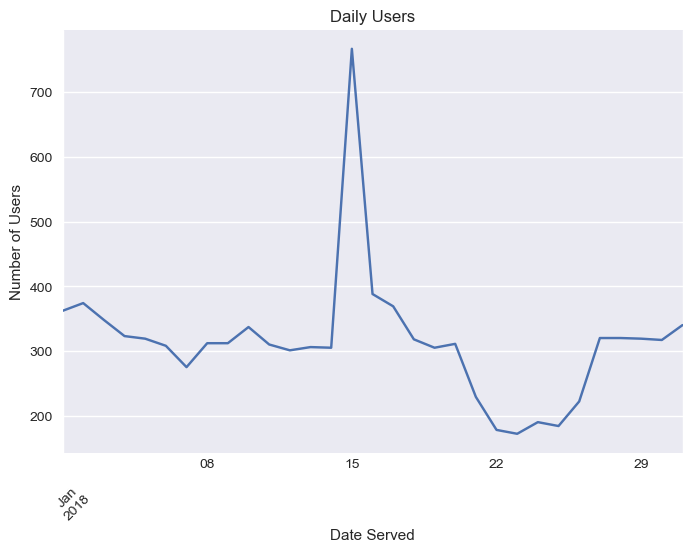

In [24]:
# plot daily users
daily_users.plot()
plt.title('Daily Users')
plt.xlabel('Date Served')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

# Initial Exploratory Analysis - Conversion Rate

In [25]:
# calculate the number of people who subscribed
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# calculate total number of people marketed to
total = marketing['user_id'].nunique()

# calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), '%')

13.89 %


# Initial Exploratory Analysis - Retention Rate

In [26]:
# calculate number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

# calculate the retention rate
retention_rate = retained/subscribers
print(round(retention_rate*100,2), '%')

66.8 %


# Initial Exploratory Analysis - Customer Segmentation
Comparing language conversion rate

In [27]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [28]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [29]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


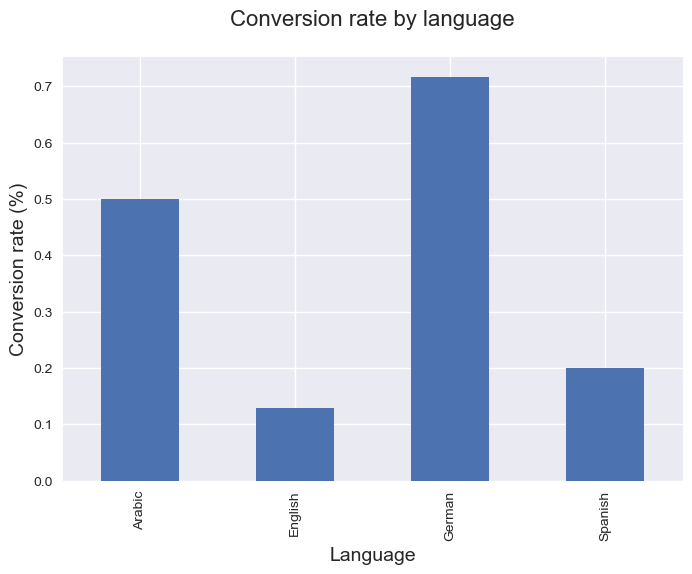

In [30]:
# Bar chart to visualize language conversion rate
language_conversion_rate.plot(kind='bar')

plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)
plt.show()

In [31]:

# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

In [32]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

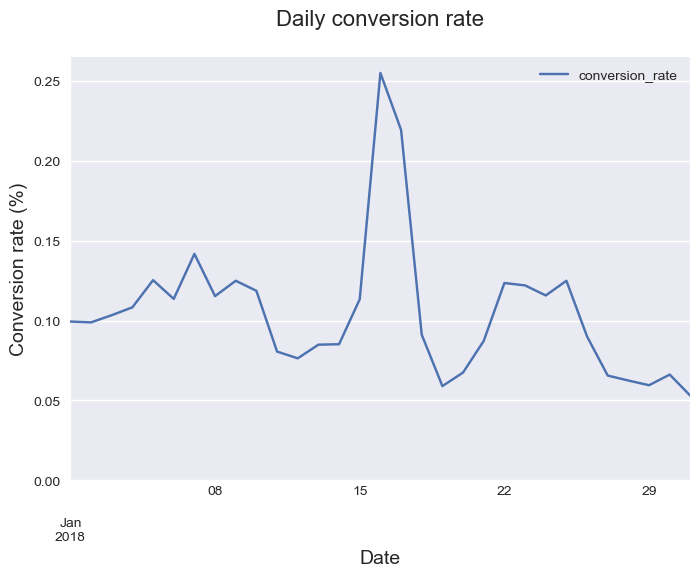

In [33]:
# Line chart to visualize daily converison rate
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)
plt.ylim(0)
plt.show()

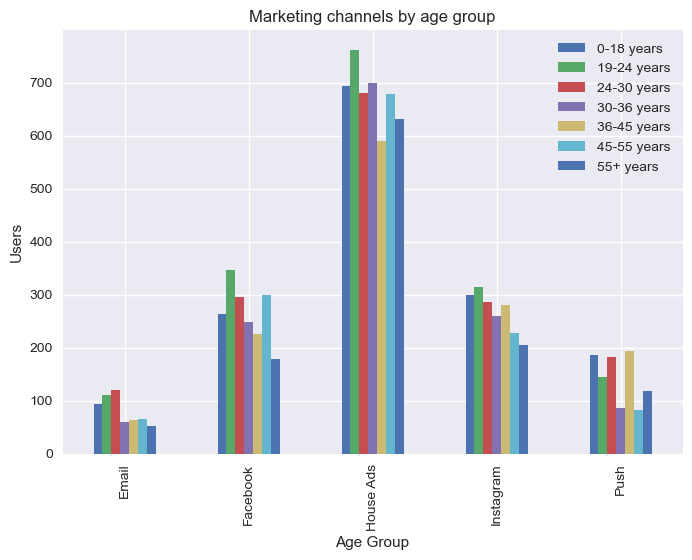

In [34]:
# Marketing Channels by age group
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')

plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

In [35]:

# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [36]:
# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed', 'subscribing_channel'])\
    ['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


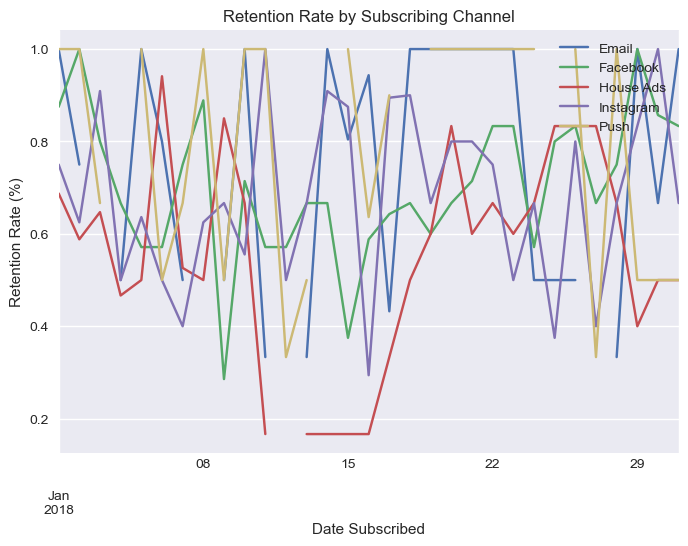

In [37]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right',
           labels = retention_rate_df.columns.values)
plt.show()

# Conversion Attribution
Building functions to automate analysis

In [38]:
# Conversion rate
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

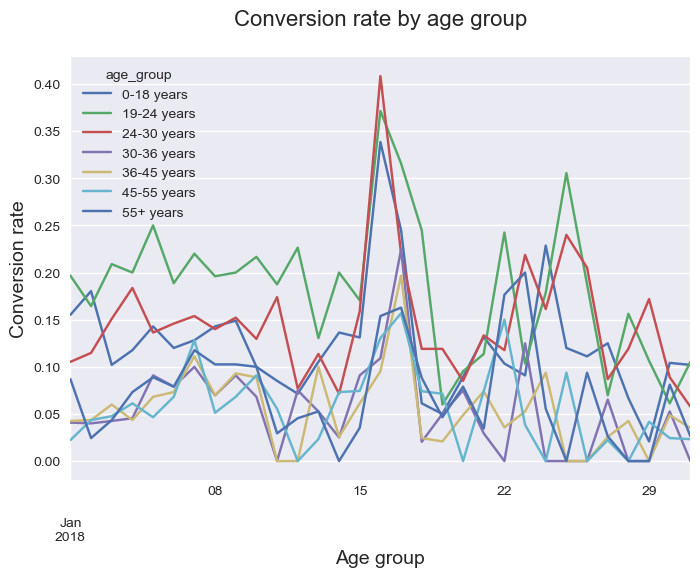

In [39]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served',
                                             'age_group'])

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [40]:
# Plotting function
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

In [41]:
%matplotlib inline

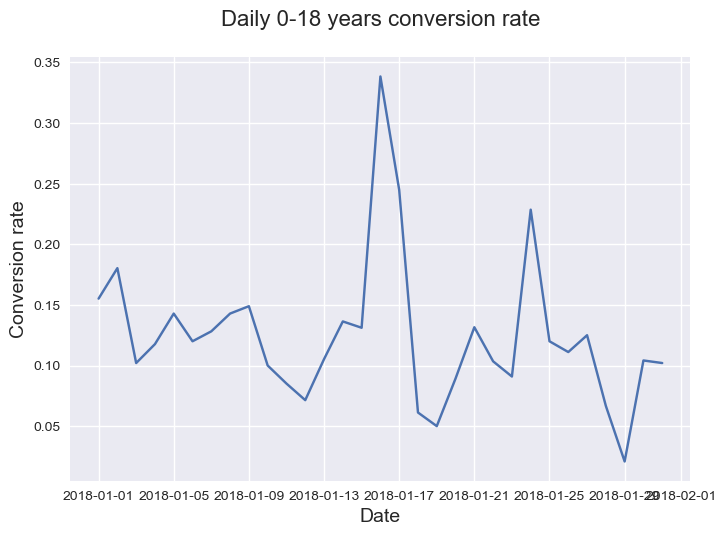

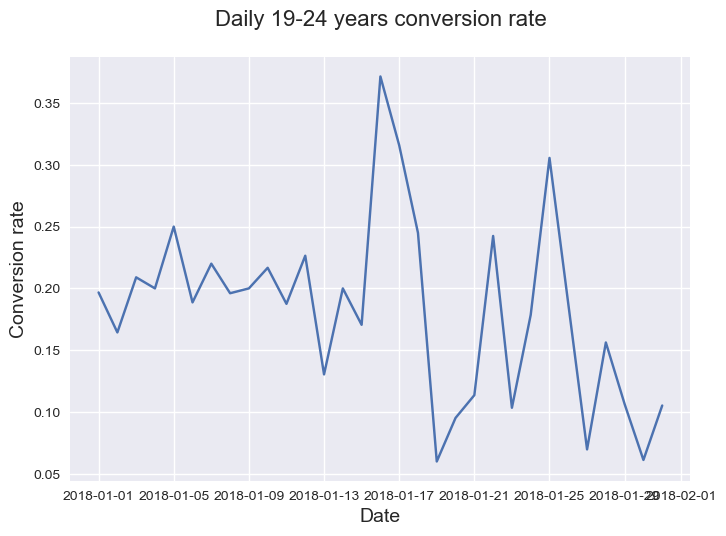

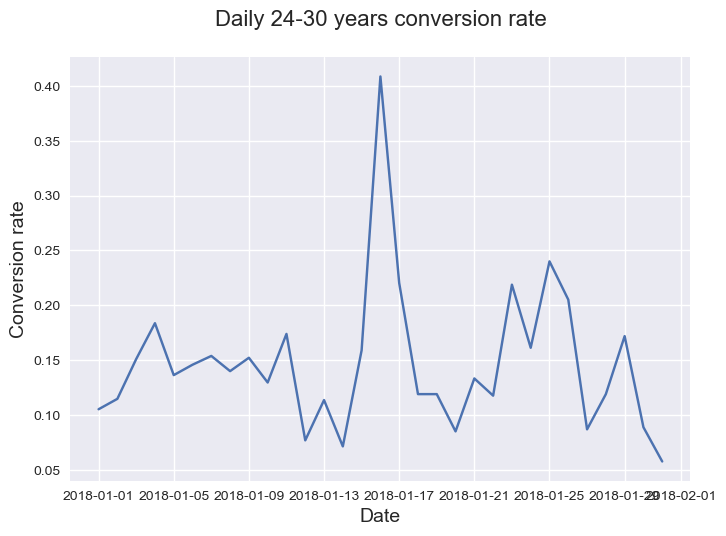

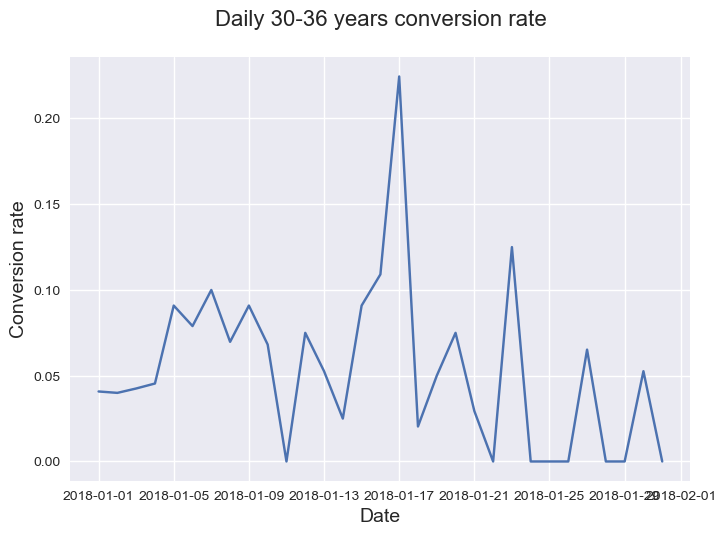

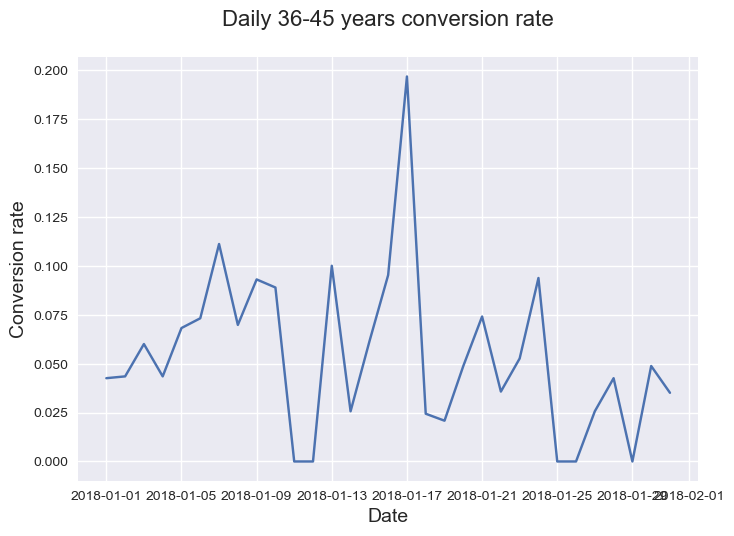

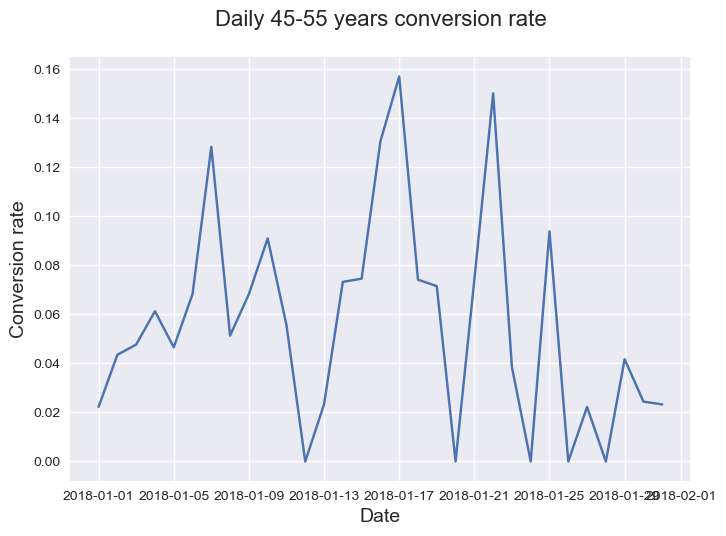

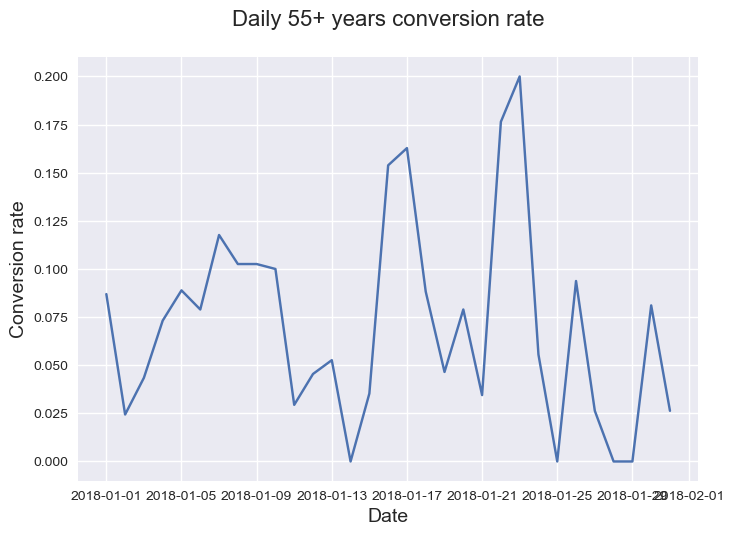

<Figure size 800x550 with 0 Axes>

In [42]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

# Day of Week Trends

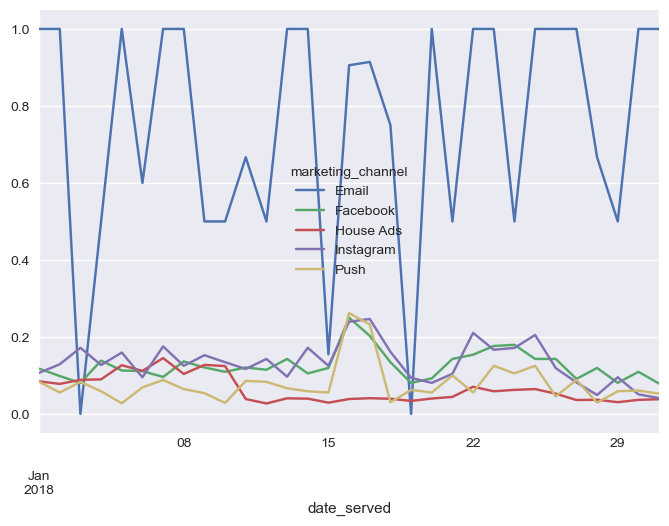

In [43]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
daily_conv_channel.plot()
plt.show()

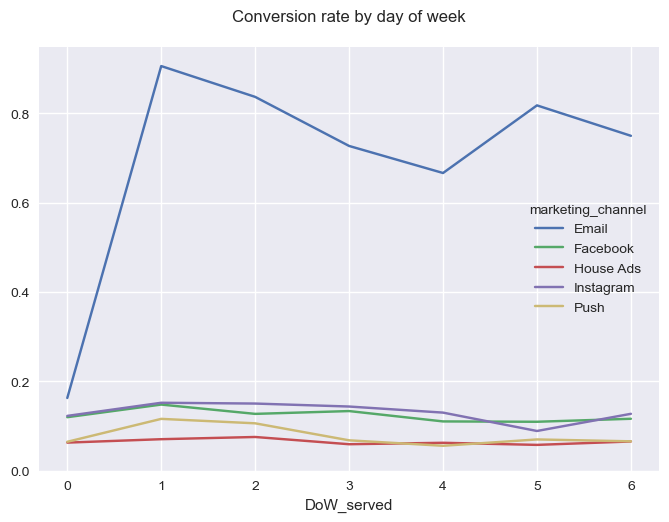

In [44]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

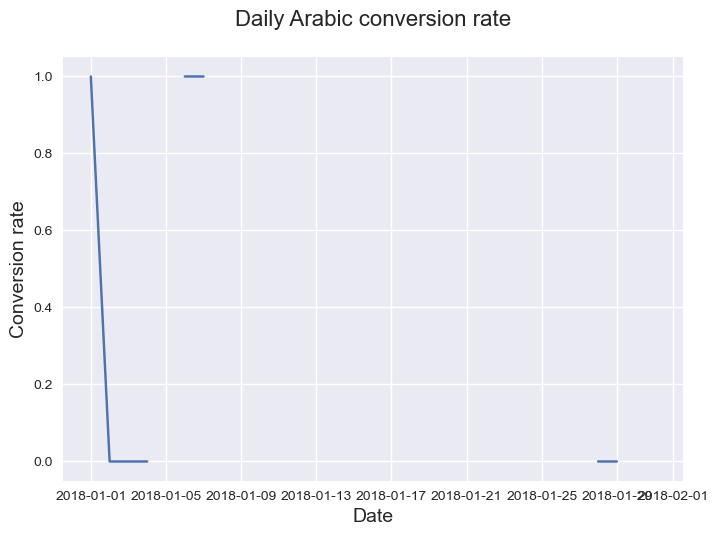

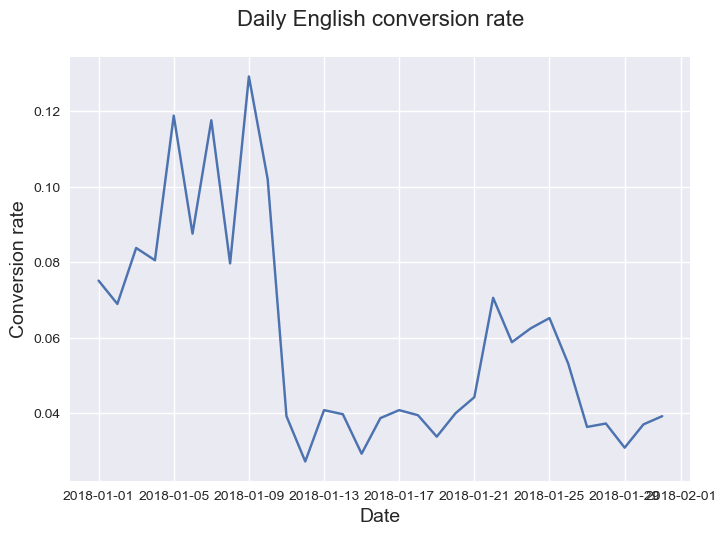

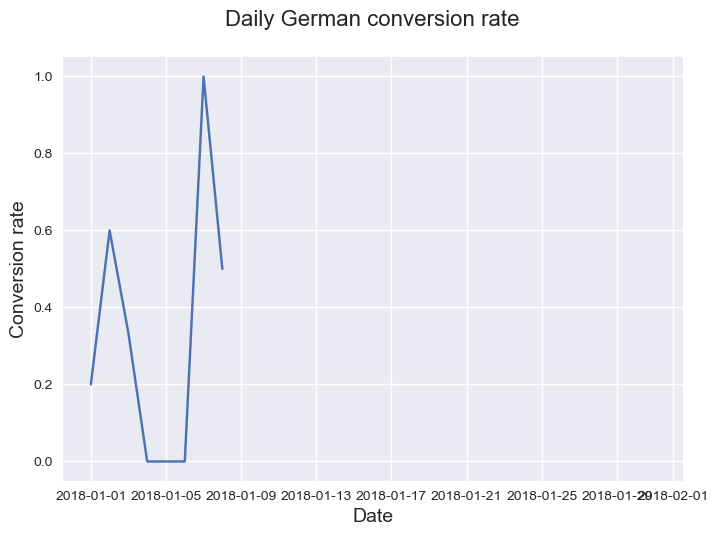

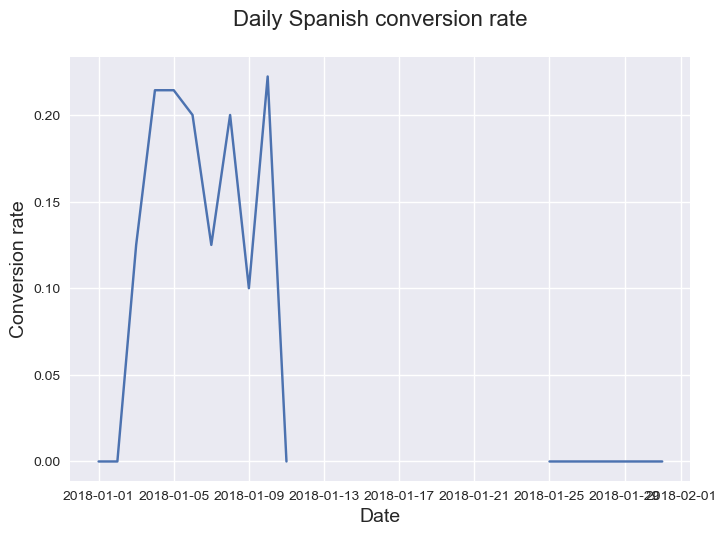

<Figure size 800x550 with 0 Axes>

In [45]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, 
                                    ['date_served', 
                                     'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use plotting function to display results
plotting_conv(conv_lang_df)

In [46]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


C:\Users\MOHAN-HOME\AppData\Local\Temp\ipykernel_16412\606452997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


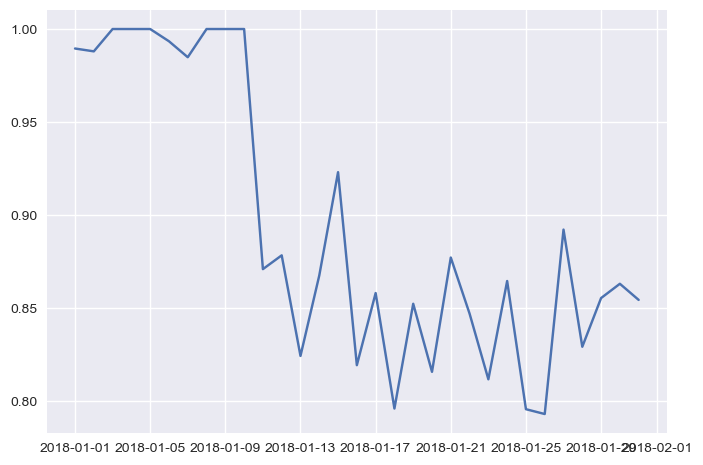

In [47]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

Users seeing adds in a non-native language.

In [48]:
# Assessing impact
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [49]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

# Personalization A/B Test

At this point, retention rate was returning ~680% which did not seem right. I proceeded to check value counts and reloaded the data set to check value counts which indicated a problem. The amount of True/False values was being tampered with through the conversion to a boolean data type. I tinkered with the data and revealed that NaN values were being turned into True/False values so I implemented `fillna(False`

Checking to ensure A/B test was distributed evenly.

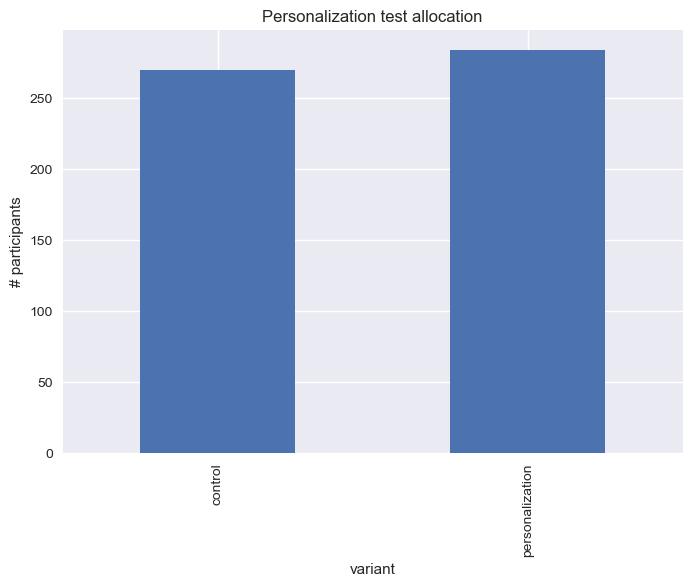

In [51]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby('variant')['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [52]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control).round(2))
print('Personalization conversion rate:', np.mean(personalization).round(2))

Control conversion rate: 0.28
Personalization conversion rate: 0.39


# Calculate lift and statistical significance

In [53]:

def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = a_mean - b_mean / b_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

-71.85%


In [54]:
from scipy.stats import ttest_ind
from scipy import stats

In [69]:
t = ttest_ind(control, personalization)
t


TtestResult(statistic=-2.734329944750507, pvalue=0.006451487844694182, df=552.0)

The results are statistically significant with p = 0.006

# Building an A/B test segmenting function

In [70]:
def ab_segmentation(segment):
    # Build a for loop for each segment in marketing
    for subsegment in np.unique(marketing[segment].values):
        print(subsegment)
        
        # Limit marketing to email and subsegment      
        email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()
        
        # Convert control and personalization arrays to numeric type, coercing errors to NaN
        control = pd.to_numeric(control, errors='coerce')
        personalization = pd.to_numeric(personalization, errors='coerce')

        # Drop NaN values from control and personalization arrays
        control = control.dropna()
        personalization = personalization.dropna()

        print('lift:', lift(control, personalization))
        print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')


In [71]:
ab_segmentation('language_displayed')

Arabic
lift: -60.0%
t-statistic: TtestResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001, df=8.0) 


English
lift: -77.08%
t-statistic: TtestResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503, df=486.0) 


German
lift: -5.88%
t-statistic: TtestResult(statistic=0.19100834180787182, pvalue=0.8494394170062678, df=42.0) 


Spanish
lift: -62.5%
t-statistic: TtestResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524, df=10.0) 




C:\Users\MOHAN-HOME\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
